# CNN on MNIST Using Keras

# Model1: 7x7 Kernel Matrix

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()

model1.add(Conv2D(16, kernel_size=(7, 7),activation='relu',input_shape=input_shape))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(32, kernel_size=(7, 7), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(64, kernel_size=(7, 7), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))


model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.7))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()



model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W1107 21:39:46.184010 139831160698624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1107 21:39:46.625596 139831160698624 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W1107 21:39:46.673560 139831160698624 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1107 21:39:46.783188 139831160698624 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

<IPython.core.display.Javascript object>


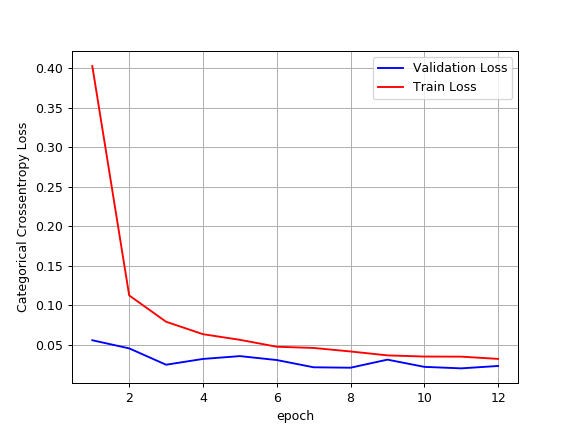

In [3]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

# Model2: 3x3 Kernel Matrix

In [34]:

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model2.add(BatchNormalization())

model2.add(Conv2D(16, kernel_size=(3, 3),strides= 2,activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(32, kernel_size=(3, 3),strides= 2, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))



model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.7))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()



model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1107 23:05:26.520308 139831160698624 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_32 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 2, 2, 32)          4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 32)          0         
__________

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [ ]:
# Model3: 2x2 Kernel Matrix

In [13]:
model3 = Sequential()

model3.add(Conv2D(4, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model3.add(Dropout(0.25))

model3.add(Conv2D(8, kernel_size=(2, 2),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(16, kernel_size=(2, 2),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.7))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()



model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1107 22:11:50.141709 139831160698624 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 4)         20        
_________________________________________________________________
dropout_11 (Dropout)         (None, 27, 27, 4)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 8)         136       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 16)          0         
__________

<IPython.core.display.Javascript object>


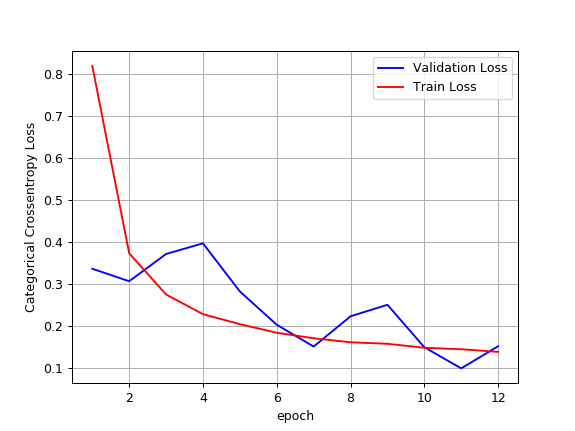

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [35]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Kernel Matrix","No.of ConVNetlayers","Test Accuracy", "Test Loss"]

x.add_row(["7x7", 3, 0.9935, 0.0231])
x.add_row(["3x3", 3, 0.984, 0.0494])
x.add_row(["2x2", 5, 0.95, 0.151])

print(x)

+---------------+---------------------+---------------+-----------+
| Kernel Matrix | No.of ConVNetlayers | Test Accuracy | Test Loss |
+---------------+---------------------+---------------+-----------+
|      7x7      |          3          |     0.9935    |   0.0231  |
|      3x3      |          3          |     0.984     |   0.0494  |
|      2x2      |          5          |      0.95     |   0.151   |
+---------------+---------------------+---------------+-----------+
